In [1]:
import pandas as pd
df=pd.read_csv("ab_data.csv")
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:49,control,old_page,0
1,804228,2017-01-12 8:01:45,control,old_page,0
2,661590,2017-01-11 16:55:06,treatment,new_page,0
3,853541,2017-01-08 18:28:03,treatment,new_page,0
4,864975,2017-01-21 1:52:26,control,old_page,1
5,936923,2017-01-10 15:20:49,control,old_page,0
6,679687,2017-01-19 3:26:47,treatment,new_page,1
7,719014,2017-01-17 1:48:30,control,old_page,0
8,817355,2017-01-04 17:58:09,treatment,new_page,1
9,839785,2017-01-15 18:11:07,treatment,new_page,1


In [2]:
obs_diff=df[df.group=="treatment"].converted.mean()-df[df.group=="control"].converted.mean()
obs_diff

-0.0014795997940775518

(array([  3.,  12.,  58., 215., 482., 588., 398., 190.,  45.,   9.]),
 array([-6.26174169e-03, -5.38138227e-03, -4.50102284e-03, -3.62066342e-03,
        -2.74030399e-03, -1.85994457e-03, -9.79585141e-04, -9.92257158e-05,
         7.81133710e-04,  1.66149314e-03,  2.54185256e-03]),
 <a list of 10 Patch objects>)

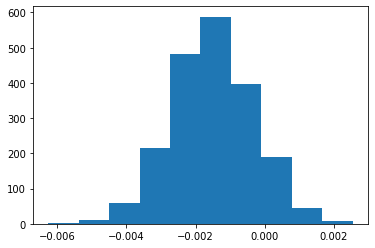

In [3]:
import matplotlib.pyplot as plt
diff=[]
for _ in range(2000):
    sample = df.sample(df.shape[0],replace=True)
    diff.append(sample[sample.group=='treatment'].converted.mean()-sample[sample.group=='control'].converted.mean())
plt.hist(diff)

(array([ 18.,  79., 239., 450., 553., 391., 179.,  74.,  14.,   3.]),
 array([-0.00359984, -0.00278459, -0.00196934, -0.00115408, -0.00033883,
         0.00047642,  0.00129168,  0.00210693,  0.00292218,  0.00373744,
         0.00455269]),
 <a list of 10 Patch objects>)

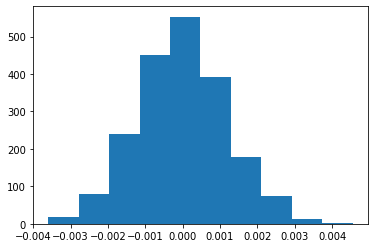

In [4]:
import numpy as np
diff = np.array(diff)
null = np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

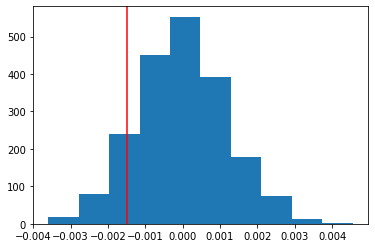

In [5]:
plt.hist(null)
plt.axvline(x=obs_diff, c='red')

In [6]:
(null>obs_diff).mean()

0.894